In [1]:
import sys
import os
from pathlib import Path
current_dir = os.path.join(Path().resolve())
sys.path.append(str(current_dir) + '/../')

import yaml
import matplotlib.pyplot as plt

from src.TTT_env import TTTBoard, TTTEnv
from src.TTT_agent import PlayerRandom

In [2]:
# 設定ファイルの読み込み
config_dir = '../config/'
with open(os.path.join(config_dir,'config.yaml'), 'r') as yml:
    config = yaml.safe_load(yml)

PLAYER_AGENT=config['PLAYER_AGENT']
PLAYER_OPPONENT=config['PLAYER_OPPONENT']
EPISODES=config['EPISODES']

# agentの定義
p1=PlayerRandom(PLAYER_AGENT, "Random1")
p2=PlayerRandom(PLAYER_OPPONENT, "Random2")

# 環境の定義
env=TTTEnv(p1, p2)
all_epochs = []
all_total_rewards = []
total_reward = 0

for episode in range(EPISODES):
    obs = env.reset()
    done = False
    epochs = 0

    while not done:
        obs, reward, done, info = env.step(env.player_turn.act(env.board_env))

        epochs += 1
        total_reward += reward

    all_epochs.append(epochs)
    all_total_rewards.append(total_reward)

    

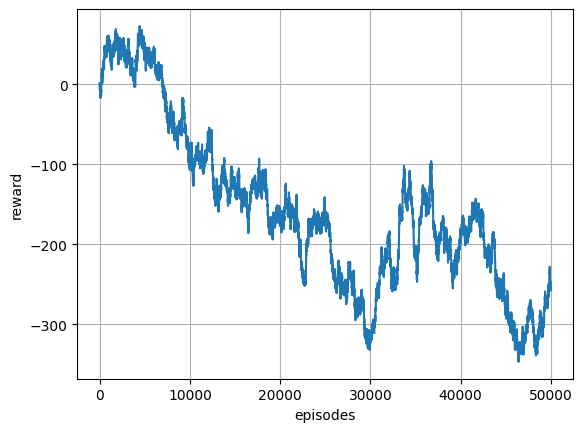

In [3]:
plt.plot(list(range(EPISODES)), all_total_rewards)
plt.xlabel("episodes")
plt.ylabel("reward")
plt.grid(True)